In [65]:
# script to get and plot TTS for campaign average conditions, varying tau 
# date created: 2/16/2020
# author: sofia chelpon
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [66]:
############################ PREP WORKSPACE ############################

In [1]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [2]:
# read in ratios dataframe
contrast_ratios = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/contrast_ratios_twp_awas_replace.pkl")
ratios_sort = contrast_ratios.sort_values(['BL_tau'])
ratios_sort.head()

# utbl, same for all 
utbl = ratios_sort['All RF']

In [3]:
contrast_ratios

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,All RF,RF03,RF04,RF05,RF06,RF07,RF08,RF09,RF10,RF11,RF12,RF13,RF14,RF15
0,AWAS,C2H6_Ethane,18.996560,51.867565,170.000000,0.598920,NaN,NaN,0.530514,0.374649,0.574789,0.521834,NaN,0.862412,0.867341,NaN,NaN,NaN,0.694157
1,AWAS,C2H2_Ethyne,5.460657,9.761061,18.790019,0.467306,NaN,NaN,0.325139,0.284318,0.578051,0.434454,NaN,1.215641,0.864908,NaN,NaN,NaN,0.532719
2,AWAS,C3H8_Propane,4.276704,9.379963,22.541651,0.281993,NaN,NaN,0.181851,0.150626,0.413577,0.242300,NaN,1.164780,0.886752,NaN,NaN,NaN,0.620690
3,AWAS,C4H10_Isobutane,2.193483,4.101641,7.916587,0.197171,NaN,NaN,0.125051,0.121909,0.540793,0.180229,NaN,1.450550,0.933333,NaN,NaN,NaN,0.561290
4,AWAS,C4H10_nButane,1.979710,3.901968,8.096203,0.207489,NaN,NaN,0.148701,0.138633,0.572463,0.175000,NaN,1.314560,1.128682,NaN,NaN,NaN,0.692473
5,AWAS,C5H12_nPentane,1.225894,2.360346,4.742530,0.192745,NaN,NaN,0.177102,0.091359,1.098143,0.169452,NaN,1.147222,1.291667,NaN,NaN,NaN,1.833333
6,AWAS,C6H6_Benzene,3.819659,6.602596,12.137543,0.363978,NaN,NaN,0.206074,0.209702,0.580932,0.303141,NaN,0.900744,0.821719,NaN,NaN,NaN,0.410526
7,AWAS,OCS_Carbonyl_sulfide,2000.000000,2000.000000,2000.000000,1.004232,NaN,NaN,0.991044,1.001746,1.027613,1.044827,NaN,1.025027,0.999544,NaN,NaN,NaN,0.942480
8,AWAS,C2H6S_Dimethyl_sulfide,0.655356,0.377066,0.407900,0.021444,NaN,NaN,0.030789,0.018999,0.019636,0.005484,NaN,0.125389,0.015379,NaN,NaN,NaN,0.010884
9,AWAS,CCl2F2_CFC_12,37000.000000,37000.000000,37000.000000,1.002709,NaN,NaN,1.002594,1.002320,1.002741,1.009211,NaN,1.003206,0.998242,NaN,NaN,NaN,0.993881


In [4]:
############################ GET TTS OUTPUTS FOR EA. CASE ############################

In [5]:
# --------------- ver 1: BL TAU 
tau_bl = ratios_sort['BL_tau'].values

# get inputs
t_bl, exp_decay_matrix_bl, LT_bl = tts_mod.prep_for_tts(tau_bl)
# get tts 
my_mustar_bl, my_r2_bl, my_gf_bl, my_t_bl, mean_age_bl, \
    mode_age_bl, best_k_bl = tts_mod.get_tts(utbl, tau_bl, t_bl, exp_decay_matrix_bl, LT_bl)

In [6]:
# save campaign average for later use 
campaign_avg_figa = pd.DataFrame()
campaign_avg_figa['tau'] = tau_bl
campaign_avg_figa['utbl'] = utbl.values
campaign_avg_figa['mustar'] = my_mustar_bl

campaign_avg_figb = pd.DataFrame()
campaign_avg_figb['t'] = t_bl/86400
campaign_avg_figb['gf'] = my_gf_bl

campaign_avg_stats = pd.DataFrame({'r squared': [my_r2_bl], 'mean age': [mean_age_bl], 'mode age': [mode_age_bl]})

campaign_avg_figa.to_pickle('./campaign_avg_figa.pkl')
campaign_avg_figb.to_pickle('./campaign_avg_figb.pkl')
campaign_avg_stats.to_pickle('./campaign_avg_stats.pkl')

In [7]:
# --------------- ver 2: BL TROPO
tau_tr = ratios_sort['TROPO_tau'].values

# get inputs
t_tr, exp_decay_matrix_tr, LT_tr = tts_mod.prep_for_tts(tau_tr)
# get tts 
my_mustar_tr, my_r2_tr, my_gf_tr, my_t_tr, mean_age_tr, \
    mode_age_tr, best_k_tr = tts_mod.get_tts(utbl, tau_tr, t_tr, exp_decay_matrix_tr, LT_tr)

In [8]:
# --------------- ver 2: BL UT
tau_ut = ratios_sort['UT_tau'].values

# get inputs
t_ut, exp_decay_matrix_ut, LT_ut = tts_mod.prep_for_tts(tau_ut)
# get tts 
my_mustar_ut, my_r2_ut, my_gf_ut, my_t_ut, mean_age_ut, \
    mode_age_ut, best_k_tr = tts_mod.get_tts(utbl, tau_ut, t_ut, exp_decay_matrix_ut, LT_ut)

In [9]:
############################ PLOT TTS OUTPUTS FOR EA. CASE ############################
# import my TTS module, need to add path to folder
import imp
imp.reload(tts_mod)

<module 'tts_mod' from '/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py'>

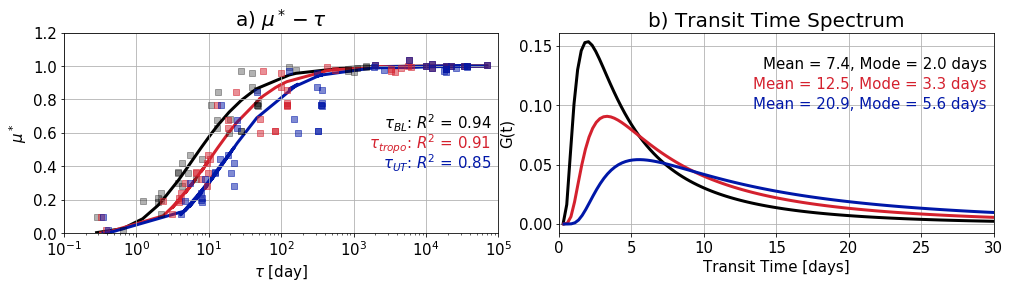

In [10]:
# --------------- start plot with BL case
title_str = r'$\tau_{BL}$: '
my_color = 'k'
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_bl, my_mustar_bl, utbl, my_r2_bl, my_gf_bl, 
                                        my_t_bl, mean_age_bl, mode_age_bl, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- add TROPO case 
title_str = r'$\tau_{tropo}$: '
my_color = [0.83, 0.13, 0.18]
overplot = 1
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau_tr, my_mustar_tr, utbl, my_r2_tr, my_gf_tr, 
                                        my_t_tr, mean_age_tr, mode_age_tr, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- add UT case 
title_str = r'$\tau_{UT}$: '
my_color = [0, 0.09, 0.66] #pantone blue
overplot = 2
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau_ut, my_mustar_ut, utbl, my_r2_ut, my_gf_ut, 
                                        my_t_ut, mean_age_ut, mode_age_ut, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- save figure 
fig.savefig('./tts_vary_tau_twp.pdf')  
#fig.savefig(svpath + 'tts_vary_tau.svg')  